In [3]:
import requests
from lxml import html
from time import sleep
import pandas as pd
from random import randint
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_3) AppleWebKit/604.5.6 (KHTML, like Gecko) Version/11.0.3 Safari/604.5.6'
headers = {'User-Agent': user_agent}

In [10]:
xpath_reviews = '//div[@data-hook="review"]'
xpath_product = '//*[@id="cm_cr-product_info"]//h1/a//text()'
xpath_next = '//*[@id="cm_cr-pagination_bar"]/ul/li[5]/a/@class'

In [11]:
xpath_rating  = './/i[@data-hook="review-star-rating"]//text()' 
xpath_title   = './/a[@data-hook="review-title"]//text()'
xpath_author  = './/a[@data-hook="review-author"]//text()'
xpath_date    = './/span[@data-hook="review-date"]//text()'
xpath_body    = './/span[@data-hook="review-body"]//text()'
xpath_helpful = './/span[@data-hook="helpful-vote-statement"]//text()'

In [22]:
product_list = ['B01MSZ036Q', 
                'B0748TR6Q1', 'B01NAGRRRU', 'B0798B31TC', 'B0798LCJK9', 'B06XFLXY8S'] 

#'B01IENFJ14', 'B06XG7WKKL', 'B0798FVV6V'
#reviews_df = pd.DataFrame()
end_page = 1

for product in product_list:
    i = 1
    while i <= end_page:
        amazon_url = 'https://www.amazon.com/product-reviews/'+product+'?pageNumber='+str(i)
        page = requests.get(amazon_url, headers = headers)        
        parser = html.fromstring(page.content)

        reviews = parser.xpath(xpath_reviews)
        product_name = parser.xpath(xpath_product)
        
        if i == 1:
            end_page = int(parser.xpath('//*[@id="cm_cr-pagination_bar"]/ul/li//text()')[-3])
        
        for review in reviews:    
            try:
                helpful= int(re.findall('\d+',review.xpath(xpath_helpful)[0])[0])
            except IndexError:
                try:
                    if 'One' in re.findall('\D+',review.xpath(xpath_helpful)[0])[0]:
                        helpful = 1
                    else: 
                        helpful = 0
                except:
                    helpful = 0
                    
            try:
                comment = review.xpath(xpath_body)[0]
            except IndexError:
                comment = ''

            review_dict = {'product_name': product_name[0], 
                           'rating': float(re.findall('[0-9*].[0-9*]',review.xpath(xpath_rating)[0])[0]),
                           'title': review.xpath(xpath_title)[0], 
                           'author': review.xpath(xpath_author)[0], 
                           'date': review.xpath(xpath_date)[0][3:], 
                           'comment': comment, 
                           'helpful': helpful
                          }
            reviews_df = reviews_df.append(review_dict, ignore_index=True)
        i += 1
        sleep(randint(3, 11))
    print (product, product_name, end_page)

B01MSZ036Q ['Dyson V7 Motorhead Cord Free Vacuum'] 48
B0748TR6Q1 ['Dyson V7 Trigger Cord-Free Handheld Vacuum'] 7
B01NAGRRRU ['Dyson Ball Multi Floor 2 Upright Vacuum'] 45
B0798B31TC ['Dyson Cyclone V10 Motorhead Lightweight Cordless Stick Vacuum Cleaner'] 3
B0798LCJK9 ['Dyson Cyclone V10 Animal Lightweight Cordless Stick Vacuum Cleaner'] 3
B06XFLXY8S ['Dyson V8 Absolute Cordless HEPA Vacuum Cleaner + Fluffy Soft Roller and Direct Drive Cleaner Head + Wand Set + Mini Motorized Tool + Dusting Brush + Docking Station + Combination Tool + Crevice Tool'] 8


In [23]:
reviews_df

,author,comment,date,helpful,product_name,rating,title
0,htieguba,When I purchased my first Dyson V6 two years a...,"August 24, 2016",1.0,Dyson V8 Absolute Cord-Free Vacuum,4.0,Doesn't Warrant an Upgrade from the V6
1,PaPe,"Got mine yesterday, charged it, vacuumed my do...","April 28, 2017",888.0,Dyson V8 Absolute Cord-Free Vacuum,3.0,I'll say that it picked up quite well and I ab...
2,Consumer,I find it hard to believe that a company that ...,"January 3, 2017",1.0,Dyson V8 Absolute Cord-Free Vacuum,1.0,I wish Dyson could innovate their customer ser...
3,Bob125,We have used a V6 for several years and we wer...,"December 4, 2016",552.0,Dyson V8 Absolute Cord-Free Vacuum,5.0,Dyson V6 compared to the Dyson V8
4,Harlan,Don't get the power head caught in a rug or th...,"July 19, 2017",41.0,Dyson V8 Absolute Cord-Free Vacuum,1.0,Plastic gears strip in powerhead
5,D. Cole,"I want to give this 4.5 stars but I cant. Now,...","June 6, 2017",19.0,Dyson V8 Absolute Cord-Free Vacuum,5.0,Am I nuts paying this much for a vacuum???
6,Dave,"I have never owned a Dyson before, but I had h...","August 30, 2016",1.0,Dyson V8 Absolute Cord-Free Vacuum,1.0,I wish I hadn't bought this.......
7,Marilyn M.,"Wow, was my first thought, on the first use......","June 3, 2017",14.0,Dyson V8 Absolute Cord-Free Vacuum,5.0,Amazing
8,JDC,For the price this vacuum leaves a lot to be d...,"August 4, 2017",13.0,Dyson V8 Absolute Cord-Free Vacuum,3.0,Leaves a lot to be desired
9,R,We were really excited when we purchased this ...,"January 20, 2018",19.0,Dyson V8 Absolute Cord-Free Vacuum,1.0,One year later - BUYER'S REMORSE


In [21]:
df = pd.read_pickle('dyson.pkl')

In [18]:
#renove dulplicate reviews 
df = df[(df.product_name != 'Dyson Cyclone V10 Motorhead Lightweight Cordless Stick Vacuum Cleaner') & \
        (df.product_name != 'Dyson Cyclone V10 Animal Lightweight Cordless Stick Vacuum Cleaner')]

In [22]:
df.product_name.value_counts()

Dyson V8 Absolute Cord-Free Vacuum                                                                                                                                                                        1660
Dyson V8 Animal Cord Free Vacuum, Iron/Titanium                                                                                                                                                            554
Dyson V7 Motorhead Cord Free Vacuum                                                                                                                                                                        479
Dyson Ball Multi Floor 2 Upright Vacuum                                                                                                                                                                    449
Dyson V8 Absolute Cordless HEPA Vacuum Cleaner + Fluffy Soft Roller and Direct Drive Cleaner Head + Wand Set + Mini Motorized Tool + Dusting Brush + Docking Station + Combi

In [20]:
df.to_pickle('dyson.pkl')

In [87]:
df.sample(3)

,author,comment,date,helpful,product_name,rating,title,comment_length
924,Amazon Customer,It's awesome. Great vacuum with beautiful desi...,2017-01-03,0.0,Dyson V8,5.0,must have vacuum,20
190,K Co.,I debated quite a bit on getting this since it...,2018-02-12,0.0,Dyson V8,5.0,I must say this is definitely a good buy. 1,86
1254,Frederick Stocker,charge doesn't last as long as advertised,2017-01-02,1.0,Dyson V8,4.0,Four Stars,7


In [23]:
df.date = pd.to_datetime(df.date)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3316 entries, 0 to 3373
Data columns (total 7 columns):
author          3316 non-null object
comment         3316 non-null object
date            3316 non-null datetime64[ns]
helpful         3316 non-null float64
product_name    3316 non-null object
rating          3316 non-null float64
title           3316 non-null object
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 207.2+ KB


# Data Analysis

In [25]:
# comment len
df['comment_length'] = df.comment.apply(lambda x: len(x.split(' ')))

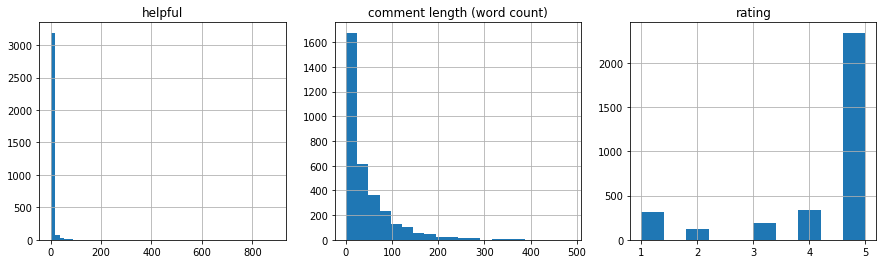

In [26]:
fig, axes = plt.subplots(1,3, figsize=(15,4))

df.helpful.hist(ax=axes[0], bins=50);
axes[0].set_title('helpful');

df.comment_length.hist(ax=axes[1], bins=20);
axes[1].set_title('comment length (word count)');

df.rating.hist(ax=axes[2])
axes[2].set_title('rating');

In [27]:
df.product_name = df.product_name.apply(lambda x: 'Dyson V8 HEPA' if x == 'Dyson V8 Absolute Cordless HEPA Vacuum Cleaner + Fluffy Soft Roller and Direct Drive Cleaner Head + Wand Set + Mini Motorized Tool + Dusting Brush + Docking Station + Combination Tool + Crevice Tool' else x)
df.product_name = df.product_name.apply(lambda x: 'Dyson V8' if x == 'Dyson V8 Absolute Cord-Free Vacuum' else x)
df.product_name = df.product_name.apply(lambda x: 'Dyson V8 Animal' if x == 'Dyson V8 Animal Cord Free Vacuum, Iron/Titanium' else x)
df.product_name = df.product_name.apply(lambda x: 'Dyson V10' if x == 'Dyson Cyclone V10 Absolute Lightweight Cordless Stick Vacuum Cleaner' else x)
df.product_name = df.product_name.apply(lambda x: 'Dyson V7 Motorhead' if x == 'Dyson V7 Motorhead Cord Free Vacuum' else x)
df.product_name = df.product_name.apply(lambda x: 'Dyson V7 Trigger' if x == 'Dyson V7 Trigger Cord-Free Handheld Vacuum' else x)
df.product_name = df.product_name.apply(lambda x: 'Dyson Ball' if x == 'Dyson Ball Multi Floor 2 Upright Vacuum' else x)

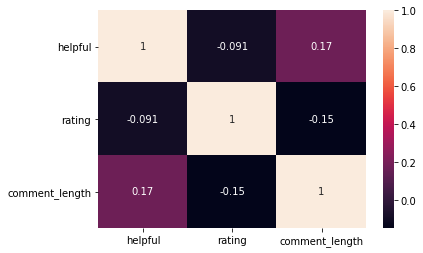

In [28]:
sns.heatmap(df.corr(), annot=True)

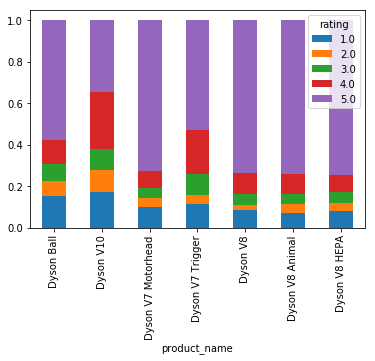

In [29]:
#rating by products , rating
chart = df.pivot_table(index='product_name', 
                       columns='rating', 
                       values = 'author', 
                       aggfunc='count')
chart.apply(lambda x: x/chart.sum(axis=1)).plot.bar(stacked=True);

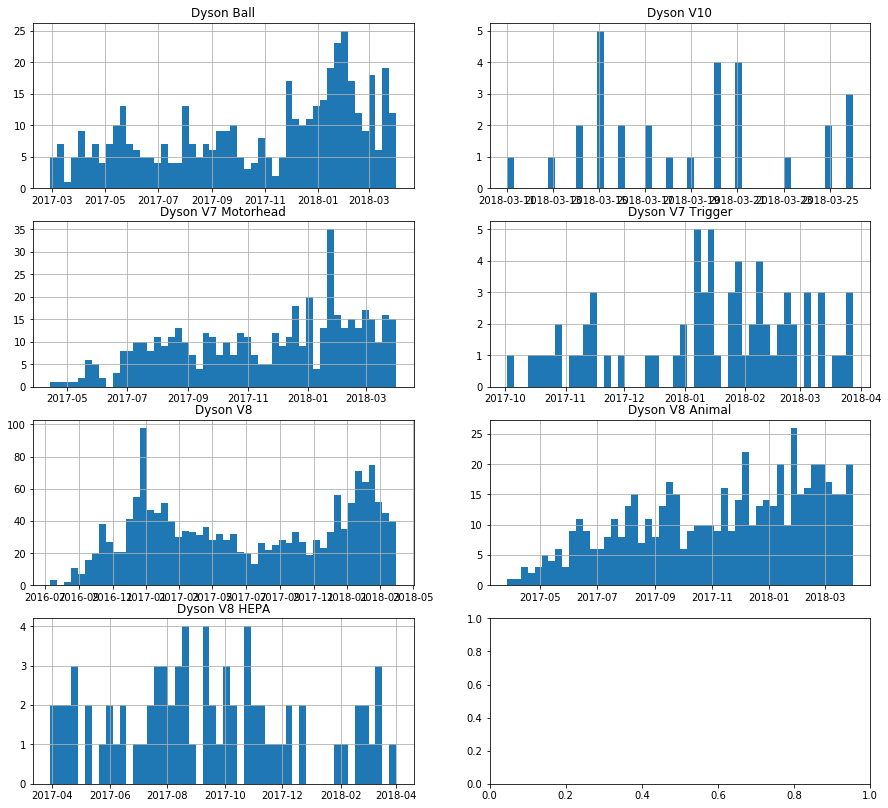

In [40]:
fig, axes = plt.subplots(4,2, figsize=(15,14))

df[df.product_name == 'Dyson Ball'].date.hist(bins=50, ax=axes[0,0]);
axes[0,0].set_title('Dyson Ball')

df[df.product_name == 'Dyson V10'].date.hist(bins=50, ax=axes[0,1]);
axes[0,1].set_title('Dyson V10')

df[df.product_name == 'Dyson V7 Motorhead'].date.hist(bins=50, ax=axes[1,0]);
axes[1,0].set_title('Dyson V7 Motorhead')

df[df.product_name == 'Dyson V7 Trigger'].date.hist(bins=50, ax=axes[1,1]);
axes[1,1].set_title('Dyson V7 Trigger')

df[df.product_name == 'Dyson V8'].date.hist(bins=50, ax=axes[2,0]);
axes[2,0].set_title('Dyson V8')

df[df.product_name == 'Dyson V8 Animal'].date.hist(bins=50, ax=axes[2,1]);
axes[2,1].set_title('Dyson V8 Animal')

df[df.product_name == 'Dyson V8 HEPA'].date.hist(bins=50, ax=axes[3,0]);
axes[3,0].set_title('Dyson V8 HEPA');

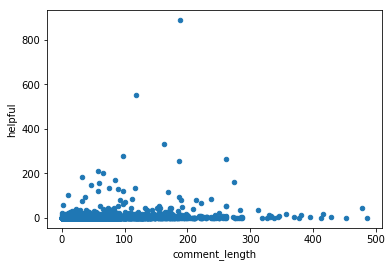

In [41]:
df.plot.scatter('comment_length', 'helpful')

In [42]:
# lowercase
df.comment = df.comment.str.lower()

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [120]:
cv = CountVectorizer(stop_words='english', ngram_range=(1,3))
v10 = df #[(df.rating < 3)]
v10_comment = cv.fit_transform(v10.comment)

In [121]:
#most common used words
pd.DataFrame(v10_comment.toarray(), columns = cv.get_feature_names()).sum().sort_values(ascending=False)

vacuum                        2234
dyson                         1212
use                            854
great                          852
love                           809
easy                           690
battery                        600
suction                        565
good                           532
time                           479
just                           473
like                           437
carpet                         411
power                          403
house                          402
clean                          383
product                        377
floors                         376
works                          373
does                           359
really                         329
light                          322
best                           320
v8                             320
used                           316
minutes                        305
ve                             296
don                            294
life                

In [132]:
v10.sample(3)

,author,comment,date,helpful,product_name,rating,title,comment_length
763,Renee Kee,works fabulous. we have an australian shepard ...,2016-12-14,0.0,Dyson V8,5.0,Five Stars,19
866,yun chen hu,"this is a very easy to use product, i really l...",2017-12-14,0.0,Dyson V8,5.0,Five Stars,12
3136,Dorothy Huffman,not a good product for old people. this thin...,2017-09-28,6.0,Dyson Ball,1.0,Awfully hard to use,56


In [133]:
v10.comment[3136]

'not a  good product for old people.  this thing is a beast.  used it for about 30 minutes and already hate it.  the hose for the attachment is so heavy and stiff it turns the unit over.  it is very heavy and unwieldy.  the only redeeming quality is the suction.'

In [126]:
from textblob import TextBlob

TextBlob(v10.comment[676]).sentiment

Sentiment(polarity=0.4131944444444445, subjectivity=0.16666666666666666)

In [127]:
TextBlob(v10.comment[676])

TextBlob("this is the best cordless vacuum on the market! i can't believe how much dust it sucked from my mattresses using the mini motorized tool!")

# NLP

In [161]:
import spacy
from gensim.models import Phrases, Word2Vec
from gensim.models.word2vec import LineSentence
from gensim.corpora import MmCorpus

In [52]:
nlp = spacy.load('en')

In [90]:
document = nlp(v10.comment[2214])

In [106]:
document

i considered giving this vacuum five stars because it really is a joy to use, but there were a few things that held me back.  i addressed some positive's and negative's of each of these points below.

In [58]:
def punct_space(token):
    """
    helper function to eliminate tokens that are pure punctuation or whitespace
    """ 
    return token.is_punct or token.is_space

In [83]:
sen = []

for sent in document.sents:
    sen.append(' '.join([token.lemma_ for token in sent if not punct_space(token)]))

In [129]:
from gensim.corpora import Dictionary, MmCorpus
from gensim.models.ldamulticore import LdaMulticore

import pyLDAvis
import pyLDAvis.gensim

In [149]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

#customizing stopwords list by combining stop words from nltk and sklearn
stoplist = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS))

In [152]:
comments = [[word for word in document.lower().split() if word not in stoplist] for document in v10.comment]

In [155]:
dictionary = Dictionary(comments)

In [162]:
corpus = [dictionary.doc2bow(text) for text in comments]
MmCorpus.serialize('/tmp/deerwester.mm', corpus)  # store to disk, for later use

In [191]:
lda = LdaMulticore(corpus,
                   num_topics=5,
                   id2word=dictionary,
                   workers=3)

In [192]:
def explore_topic(topic_number, topn=25):
    print ('{:20} {}'.format(u'term', u'frequency') + u'\n')

    for term, frequency in lda.show_topic(topic_number, topn=20):
        print ('{:20} {:.3f}'.format(term, round(frequency, 3)))

In [194]:
explore_topic(4, dictionary)

term                 frequency

vacuum               0.023
dyson                0.013
battery              0.008
it's                 0.008
it.                  0.007
love                 0.007
suction              0.006
like                 0.006
use                  0.006
time                 0.005
really               0.005
vacuum.              0.005
v8                   0.005
easy                 0.005
thing                0.004
good                 0.004
power                0.004
great                0.004
worth                0.004
new                  0.004


In [195]:
LDAvis_prepared = pyLDAvis.gensim.prepare(lda, corpus, dictionary)

In [196]:
pyLDAvis.display(LDAvis_prepared)

- On the left, there is a plot of the "distance" between all of the topics (labeled as the Intertopic Distance Map)  
    - The plot is rendered in two dimensions according a multidimensional scaling (MDS) algorithm. Topics that are generally similar should be appear close together on the plot, while dissimilar topics should appear far apart.  
    - The relative size of a topic's circle in the plot corresponds to the relative frequency of the topic in the corpus.
    - An individual topic may be selected for closer scrutiny by clicking on its circle, or entering its number in the "selected topic" box in the upper-left.  
- On the right, there is a bar chart showing top terms.  
    - When no topic is selected in the plot on the left, the bar chart shows the top-30 most "salient" terms in the corpus. A term's saliency is a measure of both how frequent the term is in the corpus and how "distinctive" it is in distinguishing between different topics.  
    - When a particular topic is selected, the bar chart changes to show the top-30 most "relevant" terms for the selected topic. The relevance metric is controlled by the parameter λ, which can be adjusted with a slider above the bar chart.
        - Setting the λ parameter close to 1.0 (the default) will rank the terms solely according to their probability within the topic.
        - Setting λ close to 0.0 will rank the terms solely according to their "distinctiveness" or "exclusivity" within the topic — i.e., terms that occur only in this topic, and do not occur in other topics.
        - Setting λ to values between 0.0 and 1.0 will result in an intermediate ranking, weighting term probability and exclusivity accordingly.

In [200]:
w2v = Word2Vec(comments, size=100, window=5,min_count=20, sg=1, workers=4)

In [205]:
def get_related_terms(token, topn=10):
    """
    look up the topn most similar terms to token and print them as a formatted list
    """
    for word, similarity in w2v.most_similar(positive=[token], topn=topn):
        print ('{:20} {}'.format(word, round(similarity, 3)))

In [209]:
get_related_terms('vacuum')

vac                  0.992
heavy                0.99
stick                0.989
owned.               0.988
cleaner              0.988
needed               0.987
powerful,            0.987
cleaner.             0.985
vacuum.              0.985
ball                 0.984


In [119]:
from wordcloud import (WordCloud, get_single_color_func)